# Data Testing using ML Models

**This module will take you through a a summary of how to test a dataset with different machine learning models.**

Directons of this module :
1. Importing the dataset
2. Data Preprocessing
3. Dropping labels
4. Splitting the dataset
5. Applying different machine learning models
6. Evaluating the results

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset I've used for this project is the GTZAN Music Genre Classification Dataset

Link : https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification

In [3]:
from google.colab import files


uploaded = files.upload()

Saving features_30_sec.csv to features_30_sec.csv


In [4]:
import io

m_data = pd.read_csv(io.BytesIO(uploaded['features_30_sec.csv']))
m_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
m_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

After successfully creating a data frame (m_data in this case), we want to explore the distribution of the 'label' column. By calling the value_counts() function on the 'label' column, we can obtain a series object that displays the unique values in the 'label' column and their respective counts.

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
m_data['label'] = label_encoder.fit_transform(m_data['label'])

### Label encoding  
is a process of converting categorical variables into numerical values. It assigns a unique numerical label to each unique category in the variable. This allows machine learning algorithms to interpret and analyze the data more effectively.

The sklearn.preprocessing module in Python provides a LabelEncoder class that can be used to perform label encoding. This class is part of the scikit-learn library, which is a popular machine learning library in Python.

In [7]:
X = m_data.drop(['label','filename'],axis=1)
y = m_data['label']

Here above, in the first line of code, we drop the 'label' and 'filename' columns.
'axis = 1' here means that we want to drop columns, not rows.

After dropping the two columns from the original dataset, we now assign the 'label' column to a new variable y.

In [8]:
# Get the column names of the dataset
cols = X.columns

# Create an instance of the Min-Max Scaler
minmax = preprocessing.MinMaxScaler()

# Scale the features of the dataset
np_scaled = minmax.fit_transform(X)

# Create a new DataFrame with the scaled features
X = pd.DataFrame(np_scaled, columns=cols)

### Feature Scaling

The following steps are followed in the code above :

1. Get the column names of the dataset using X.columns.
2. Create an instance of the Min-Max Scaler using preprocessing.MinMaxScaler().
3. Scale the features of the dataset using minmax.fit_transform(X).
4. Create a new DataFrame X with the scaled features and assign the column names using pd.DataFrame(np_scaled, columns=cols).

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 58), (300, 58), (700,), (300,))

# Testing the dataset with various Machine Learning models

In [10]:
from sklearn.metrics import classification_report

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score

from sklearn.metrics import confusion_matrix

## 1. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
lr_pred = model.predict(X_test)


LogisticRegression
Accuracy on training set is : 0.7371428571428571
Accuracy on test set is : 0.6733333333333333


## Evaluating the model results

In [13]:
print(classification_report(y_test, lr_pred))

accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred, average='macro')
recall = recall_score(y_test, lr_pred, average='macro')
f1 = f1_score(y_test, lr_pred, average='macro')
specificity = specificity_score(y_test, lr_pred, average='macro')
sensitive = sensitivity_score(y_test, lr_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, lr_pred)
mse_LR = metrics.mean_squared_error(y_test, lr_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.52      0.47      0.49        30
           1       0.86      0.97      0.91        32
           2       0.54      0.56      0.55        27
           3       0.59      0.53      0.56        30
           4       0.70      0.79      0.75        24
           5       0.74      0.69      0.71        29
           6       0.69      0.83      0.75        29
           7       0.74      0.89      0.81        36
           8       0.68      0.66      0.67        32
           9       0.53      0.32      0.40        31

    accuracy                           0.67       300
   macro avg       0.66      0.67      0.66       300
weighted avg       0.66      0.67      0.66       300

Accuracy : 0.67
Precision : 0.66
Recall : 0.67
F1 score : 0.66
Specificity : 0.96
sensitive : 0.67
Mean Absolute Error : 1.42
Mean Squared Error : 7.77


## Confusion Matrix

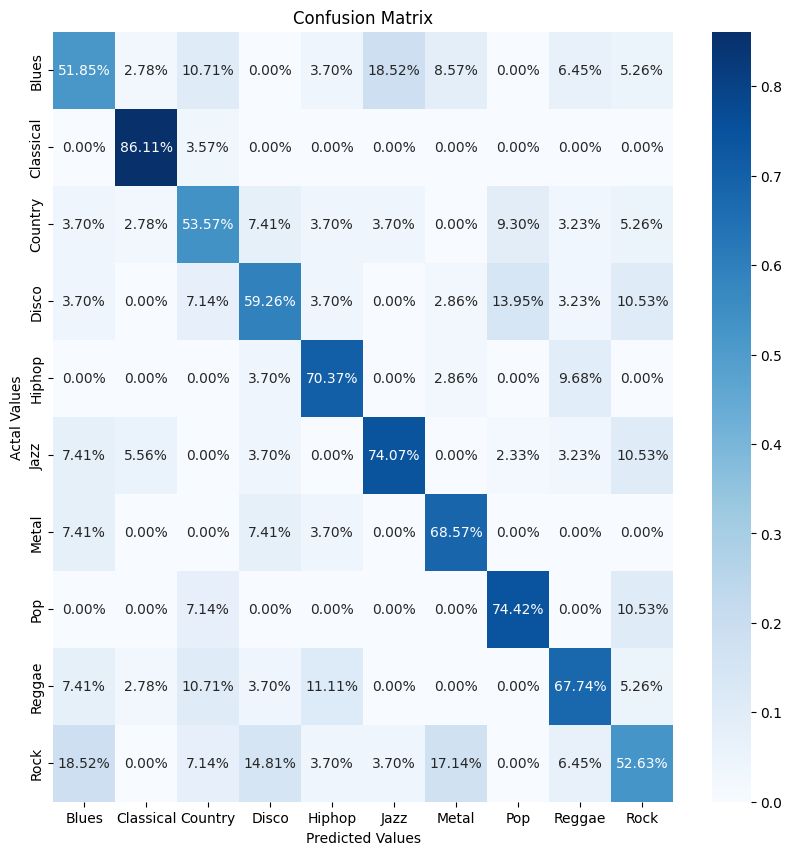

In [14]:
cm = confusion_matrix(y_test, lr_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 2. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
rf_pred = model.predict(X_test)

RandomForestClassifier
Accuracy on training set is : 0.9985714285714286
Accuracy on test set is : 0.78


In [16]:
print(classification_report(y_test, rf_pred))

accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred, average='macro')
recall = recall_score(y_test, rf_pred, average='macro')
f1 = f1_score(y_test, rf_pred, average='macro')
specificity = specificity_score(y_test, rf_pred, average='macro')
sensitive = sensitivity_score(y_test, rf_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, rf_pred)
mse_LR = metrics.mean_squared_error(y_test, rf_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.93      0.88      0.90        32
           2       0.59      0.63      0.61        27
           3       0.88      0.77      0.82        30
           4       0.80      0.83      0.82        24
           5       0.70      0.72      0.71        29
           6       0.81      0.86      0.83        29
           7       0.94      0.89      0.91        36
           8       0.69      0.91      0.78        32
           9       0.62      0.58      0.60        31

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300

Accuracy : 0.78
Precision : 0.78
Recall : 0.78
F1 score : 0.78
Specificity : 0.98
sensitive : 0.78
Mean Absolute Error : 0.76
Mean Squared Error : 3.51


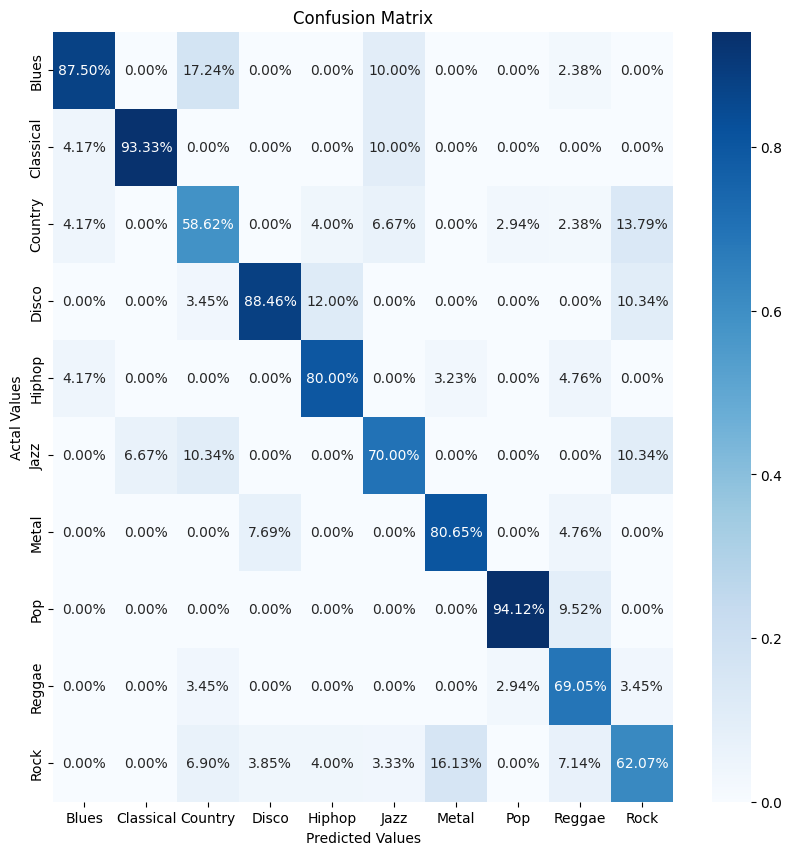

In [17]:
cm = confusion_matrix(y_test, rf_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 3. K Nearest Neighbour

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
knn_pred = model.predict(X_test)

KNeighborsClassifier
Accuracy on training set is : 0.7914285714285715
Accuracy on test set is : 0.7033333333333334


In [19]:
print(classification_report(y_test, knn_pred))

accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred, average='macro')
recall = recall_score(y_test, knn_pred, average='macro')
f1 = f1_score(y_test, knn_pred, average='macro')
specificity = specificity_score(y_test, knn_pred, average='macro')
sensitive = sensitivity_score(y_test, knn_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, knn_pred)
mse_LR = metrics.mean_squared_error(y_test, knn_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.85      0.91      0.88        32
           2       0.48      0.74      0.58        27
           3       0.58      0.63      0.60        30
           4       0.64      0.75      0.69        24
           5       0.76      0.66      0.70        29
           6       1.00      0.83      0.91        29
           7       0.84      0.86      0.85        36
           8       0.59      0.53      0.56        32
           9       0.68      0.42      0.52        31

    accuracy                           0.70       300
   macro avg       0.71      0.70      0.70       300
weighted avg       0.72      0.70      0.70       300

Accuracy : 0.70
Precision : 0.71
Recall : 0.70
F1 score : 0.70
Specificity : 0.97
sensitive : 0.70
Mean Absolute Error : 1.27
Mean Squared Error : 6.93


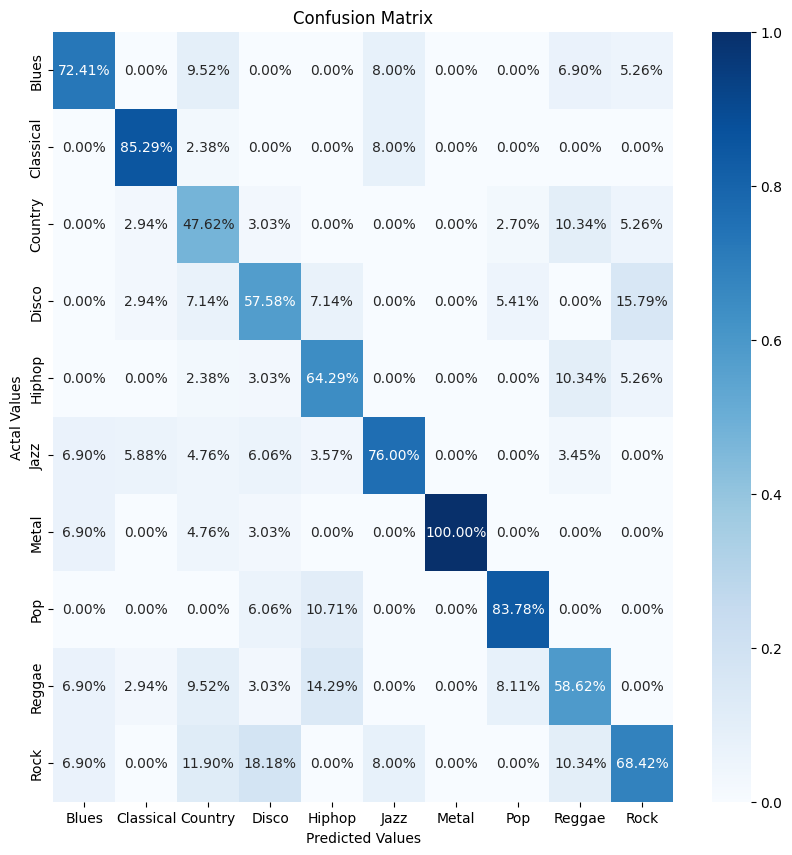

In [20]:
cm = confusion_matrix(y_test, knn_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 4. Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
dt_pred = model.predict(X_test)

DecisionTreeClassifier
Accuracy on training set is : 0.9985714285714286
Accuracy on test set is : 0.6366666666666667


In [22]:
print(classification_report(y_test, dt_pred))

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred, average='macro')
recall = recall_score(y_test, dt_pred, average='macro')
f1 = f1_score(y_test, dt_pred, average='macro')
specificity = specificity_score(y_test, dt_pred, average='macro')
sensitive = sensitivity_score(y_test, dt_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, dt_pred)
mse_LR = metrics.mean_squared_error(y_test, dt_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.58      0.60      0.59        30
           1       0.88      0.69      0.77        32
           2       0.48      0.48      0.48        27
           3       0.69      0.60      0.64        30
           4       0.61      0.79      0.69        24
           5       0.58      0.52      0.55        29
           6       0.70      0.66      0.68        29
           7       0.76      0.78      0.77        36
           8       0.62      0.72      0.67        32
           9       0.48      0.52      0.50        31

    accuracy                           0.64       300
   macro avg       0.64      0.63      0.63       300
weighted avg       0.64      0.64      0.64       300

Accuracy : 0.64
Precision : 0.64
Recall : 0.63
F1 score : 0.63
Specificity : 0.96
sensitive : 0.63
Mean Absolute Error : 1.29
Mean Squared Error : 6.59


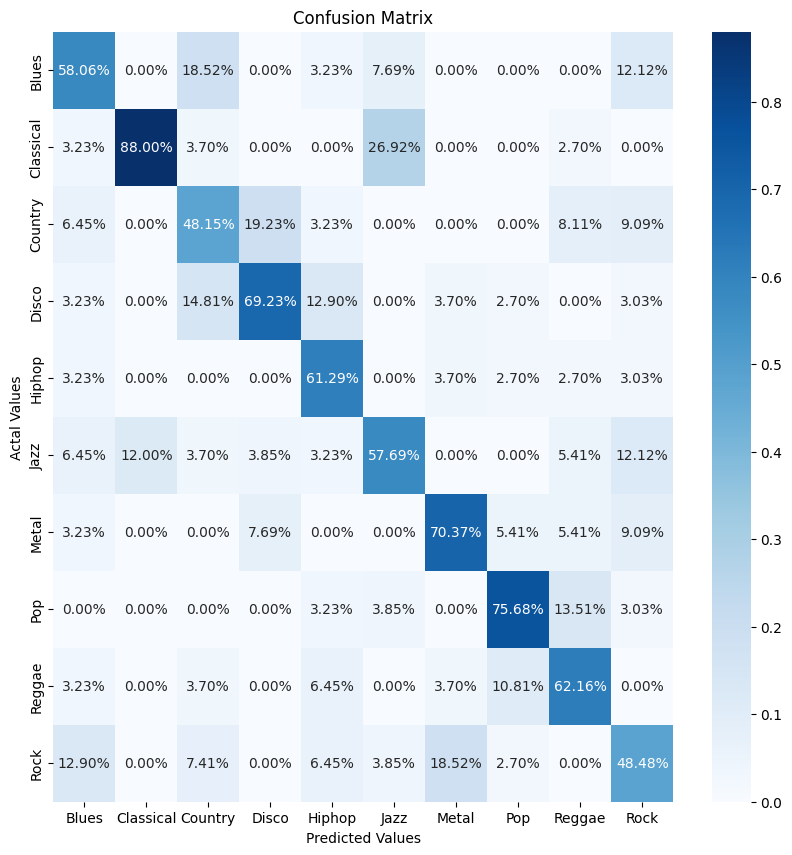

In [23]:
cm = confusion_matrix(y_test, dt_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 5. Support Vector Machine

In [24]:
from sklearn import svm
model = svm.LinearSVC()
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
svm_pred = model.predict(X_test)

LinearSVC
Accuracy on training set is : 0.8228571428571428
Accuracy on test set is : 0.7133333333333334


In [25]:
print(classification_report(y_test, svm_pred))

accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, average='macro')
recall = recall_score(y_test, svm_pred, average='macro')
f1 = f1_score(y_test, lr_pred, average='macro')
specificity = specificity_score(y_test, svm_pred, average='macro')
sensitive = sensitivity_score(y_test, svm_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, svm_pred)
mse_LR = metrics.mean_squared_error(y_test, svm_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.57      0.57      0.57        30
           1       0.86      0.97      0.91        32
           2       0.59      0.70      0.64        27
           3       0.62      0.53      0.57        30
           4       0.84      0.88      0.86        24
           5       0.77      0.83      0.80        29
           6       0.76      0.86      0.81        29
           7       0.82      0.89      0.85        36
           8       0.64      0.72      0.68        32
           9       0.50      0.19      0.28        31

    accuracy                           0.71       300
   macro avg       0.70      0.71      0.70       300
weighted avg       0.70      0.71      0.70       300

Accuracy : 0.71
Precision : 0.70
Recall : 0.71
F1 score : 0.66
Specificity : 0.97
sensitive : 0.71
Mean Absolute Error : 1.27
Mean Squared Error : 7.16


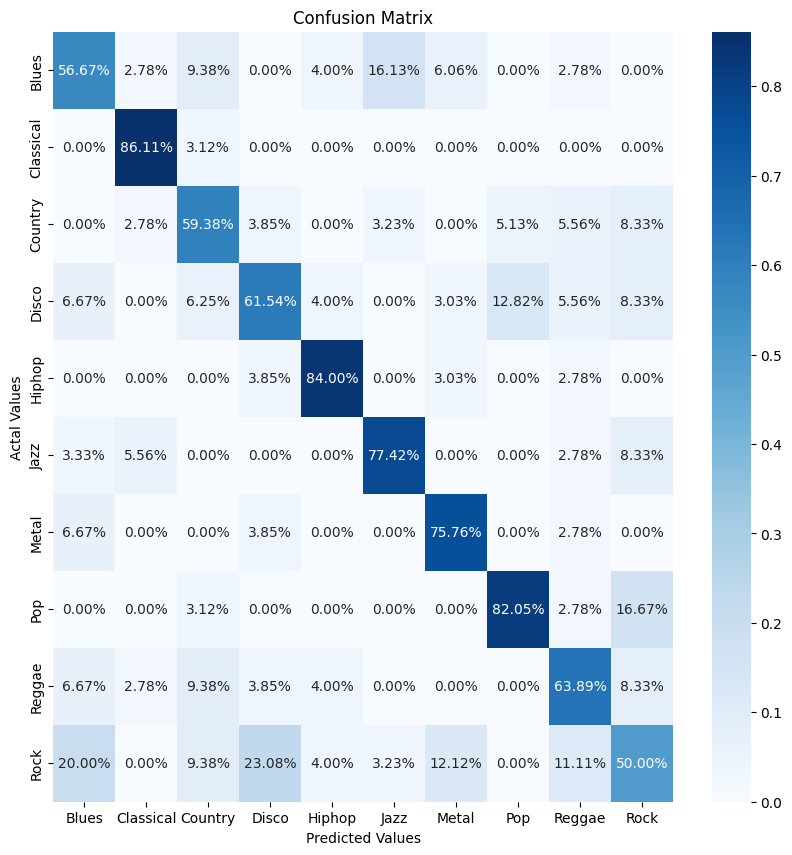

In [26]:
cm = confusion_matrix(y_test, svm_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 6. Naive Bayes Classifier

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
nb_pred = model.predict(X_test)

GaussianNB
Accuracy on training set is : 0.5985714285714285
Accuracy on test set is : 0.5633333333333334


In [28]:
print(classification_report(y_test, nb_pred))

accuracy = accuracy_score(y_test, nb_pred)
precision = precision_score(y_test, nb_pred, average='macro')
recall = recall_score(y_test, nb_pred, average='macro')
f1 = f1_score(y_test, nb_pred, average='macro')
specificity = specificity_score(y_test, nb_pred, average='macro')
sensitive = sensitivity_score(y_test, nb_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, nb_pred)
mse_LR = metrics.mean_squared_error(y_test, nb_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.43      0.70      0.53        30
           1       0.97      0.88      0.92        32
           2       0.52      0.44      0.48        27
           3       0.55      0.37      0.44        30
           4       0.78      0.58      0.67        24
           5       0.62      0.34      0.44        29
           6       0.50      0.79      0.61        29
           7       0.83      0.83      0.83        36
           8       0.39      0.47      0.43        32
           9       0.20      0.16      0.18        31

    accuracy                           0.56       300
   macro avg       0.58      0.56      0.55       300
weighted avg       0.58      0.56      0.56       300

Accuracy : 0.56
Precision : 0.58
Recall : 0.56
F1 score : 0.55
Specificity : 0.95
sensitive : 0.56
Mean Absolute Error : 1.79
Mean Squared Error : 9.82


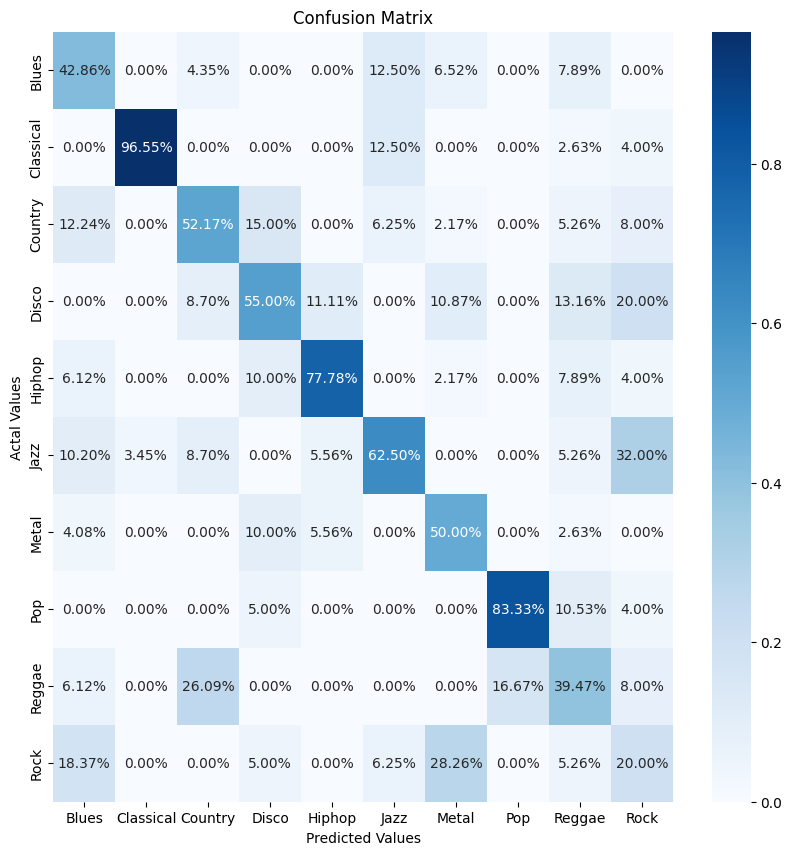

In [29]:
cm = confusion_matrix(y_test, nb_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## 7. Gradient Boost

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(X_train,y_train)
print(model.__class__.__name__)
print("Accuracy on training set is : {}".format(model.score(X_train, y_train)))
print("Accuracy on test set is : {}".format(model.score(X_test, y_test)))
gb_pred = model.predict(X_test)

XGBClassifier
Accuracy on training set is : 0.9985714285714286
Accuracy on test set is : 0.7733333333333333


In [31]:
print(classification_report(y_test, gb_pred))

accuracy = accuracy_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred, average='macro')
recall = recall_score(y_test, gb_pred, average='macro')
f1 = f1_score(y_test, gb_pred, average='macro')
specificity = specificity_score(y_test, gb_pred, average='macro')
sensitive = sensitivity_score(y_test, gb_pred, average='macro')
mae_lR = metrics.mean_absolute_error(y_test, gb_pred)
mse_LR = metrics.mean_squared_error(y_test, gb_pred)


print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1 score : {f1:.2f}")
print(f"Specificity : {specificity:.2f}")
print(f"sensitive : {sensitive:.2f}")
print(f"Mean Absolute Error : {mae_lR:.2f}")
print(f"Mean Squared Error : {mse_LR:.2f}")

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.90      0.84      0.87        32
           2       0.68      0.78      0.72        27
           3       0.82      0.77      0.79        30
           4       0.78      0.88      0.82        24
           5       0.66      0.66      0.66        29
           6       0.96      0.83      0.89        29
           7       0.89      0.89      0.89        36
           8       0.71      0.78      0.75        32
           9       0.57      0.55      0.56        31

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300

Accuracy : 0.77
Precision : 0.78
Recall : 0.77
F1 score : 0.77
Specificity : 0.97
sensitive : 0.77
Mean Absolute Error : 0.92
Mean Squared Error : 4.96


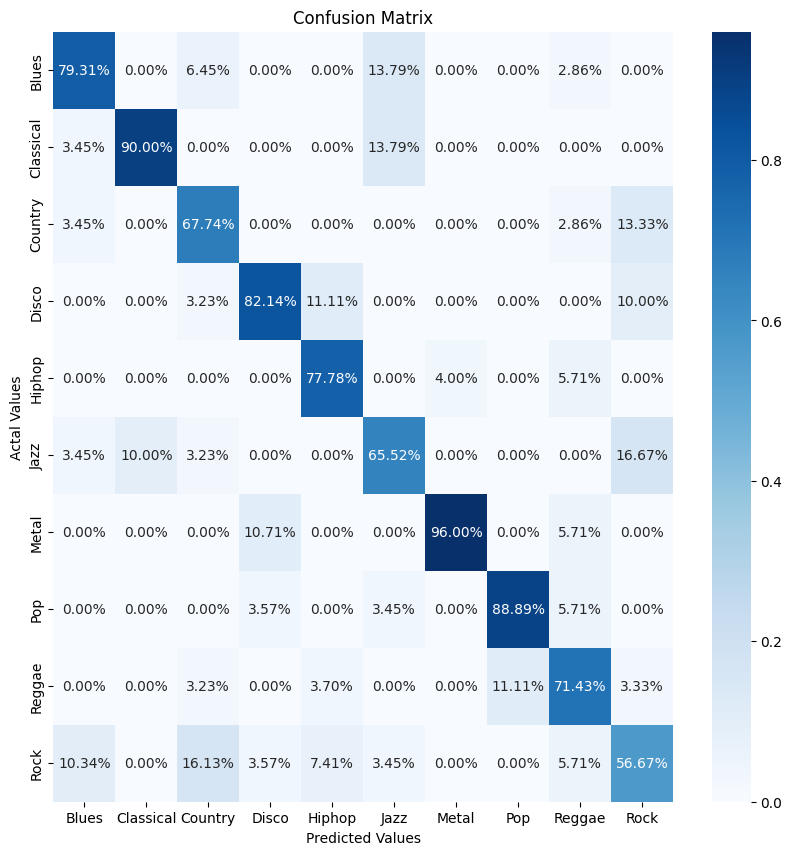

In [32]:
cm = confusion_matrix(y_test, gb_pred)
cm_df = pd.DataFrame(cm,
                     index = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'],
                     columns = ['Blues','Classical','Country','Disco','Hiphop','Jazz','Metal','Pop','Reggae','Rock'])

plt.figure(figsize=(10,10))

sns.heatmap(cm_df/np.sum(cm_df), annot=True,
            fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()